<h1>Getting started with neural networks</h1>

Notes:
    
Three most common use cases of neural networks: 
1. binary classification
2. multiclass classification
3. scalar regression.

<h2>Layers: the building blocks of deep learning</h2>

A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.

Different layers are appropriate for different tensor formats. Examples:

1. Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras)

2. Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer

3. Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).

Layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a cer- tain shape. 

Example:

#A dense layer with 32 output units

from keras import layers

layer = layers.Dense(32, input_shape=(784,))

We’re creating a layer that will only accept as input 2D tensors where the first dimen- sion is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been trans- formed to be 32.

Thus this layer can only be connected to a downstream layer that expects 32- dimensional vectors as its input. When using Keras, you don’t have to worry about compatibility, because the layers you add to your models are dynamically built to match the shape of the incoming layer. For instance, suppose you write the following:

from keras import models

from keras import layers

model = models.Sequential() 

model.add(layers.Dense(32, input_shape=(784,))) 

model.add(layers.Dense(32))

The second layer didn’t receive an input shape argument—instead, it automatically inferred its input shape as being the output shape of the layer that came before.


<h2>Models: networks of layers</h2>

Variety of network topologies. Some common ones include the following:

1. Two-branch networks 

2. Multihead networks

3. Inception blocks

<h2>Loss functions and optimizers:
keys to configuring the learning process</h2>

Once the network architecture is defined, you still have to choose two more things:

1. Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.

2. Optimizer—Determines how the network will be updated based on the loss func- tion. It implements a specific variant of stochastic gradient descent (SGD).

A neural network that has multiple outputs may have multiple loss functions (one per output). But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via averaging) into a single scalar quantity.

<h3>Developing with Keras: a quick overview</h3>

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

There are two ways to define a model: using the Sequential class (only for linear stacks of layers, which is the most common network architecture by far) or the func- tional API (for directed acyclic graphs of layers, which lets you build completely arbi- trary architectures).

As a refresher, here’s a two-layer model defined using the Sequential class (note that we’re passing the expected shape of the input data to the first layer):

In [1]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,))) 
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. All of the following steps are the same.

The learning process is configured in the compilation step, where you specify the optimizer and loss function(s) that the model should use, as well as the metrics you want to monitor during training.

Here’s an example with a single loss function, which is by far the most common case:

In [2]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the fit() method, similar to what you would do in Scikit-Learn and several other machine-learning libraries:

In [3]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'input_tensor' is not defined

<h3>Classifying movie reviews:
a binary classification example</h3>

Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

In [4]:
#DOWNLOAD THE DATA

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

For kicks, here’s how you can quickly decode one of these reviews back to English words:

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

<h3>Prepare the Data</h3>

First, turn lists into tensors. Two ways to do this:

1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer)


2. One-hot encode your lists to turn them into vectors of 0s and 1s. We will go with this solution.

<h4>Encoding the integer sequences into a binary matrix</h4>

In [9]:
import numpy as np

In [10]:
#Creates an all-zero matrix of shape (len(sequences), dimension)

def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

In [11]:
#Vectorized training data
x_train = vectorize_sequences(train_data)

In [12]:
#Vectorized test data
x_test = vectorize_sequences(test_data)

In [13]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [16]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

<h3>The model definition</h3>

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

<h3>Choose a loss function and an optimizer</h3>

Binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation).

But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of Infor- mation Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

Configure the model with the rmsprop optimizer and the binary_crossentropy loss function.

<h3>Compiling the model</h3>

In [18]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
#Using custom losses and metrics

#from keras import losses
#from keras import metrics

#model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
#              loss=losses.binary_crossentropy,
#              metrics=[metrics.binary_accuracy])


<h3>Validating your approach</h3>

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the validation_data argument.

In [21]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

In [22]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.5223 - acc: 0.7807 - val_loss: 0.3944 - val_acc: 0.8701
Epoch 2/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3062 - acc: 0.9026 - val_loss: 0.3275 - val_acc: 0.8668
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2228 - acc: 0.9287 - val_loss: 0.2806 - val_acc: 0.8884
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1771 - acc: 0.9409 - val_loss: 0.2715 - val_acc: 0.8921
Epoch 5/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1446 - acc: 0.9537 - val_loss: 0.2832 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1175 - acc: 0.9635 - val_loss: 0.3065 - val_acc: 0.8841
Epoch 7/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.0975 - acc: 0.9700 - val_loss: 0.3283 - 

In [23]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<h3>Plotting the training and validation loss</h3>

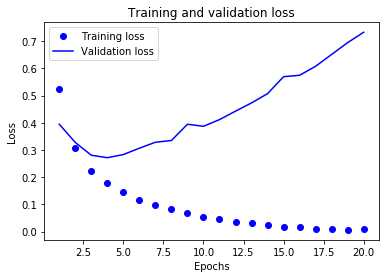

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h3>Plotting the training and validation accuracy</h3>

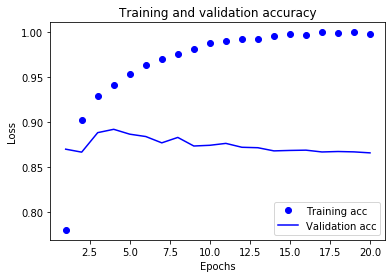

In [26]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.show()


The training loss decreases with every epoch, and the training accuracy increases with every epoch.

But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfit- ting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [28]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.4809 - accuracy: 0.8242
Epoch 2/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.2806 - accuracy: 0.9048
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2125 - accuracy: 0.9265
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


<h3>Using a trained network to generate predictions on new data</h3>

You can gen- erate the likelihood of reviews being positive by using the predict method:

In [29]:
model.predict(x_test)

array([[0.15499079],
       [0.9991169 ],
       [0.63854   ],
       ...,
       [0.07822123],
       [0.05219066],
       [0.49634087]], dtype=float32)

<h3>Future</h3>

1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

3. Try using the mse loss function instead of binary_crossentropy.

4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

<h3>Classifying newswires: a multiclass classification example</h3>

In [30]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)


2113536/2110848 [==============================] - 0s 0us/step


In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

Each example is a list of integers (word indices):

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [34]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


The label associated with an example is an integer between 0 and 45—a topic index:

In [35]:
train_labels[10]

3

In [36]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [37]:
#USE THE VECTORIZE FUNCTION ABOVE:

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
#USE ONE HOT ENCODING
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) 
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results

In [39]:
#Vectorize Training Labels
one_hot_train_labels = to_one_hot(train_labels)

In [40]:
#Vectorize Test Labels
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you’ve already seen in action in the MNIST example:

In [41]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<h3>Building your network</h3>

Note we are generating more than binary (48) so we will go with a higher layer (64).

There are two other things you should note about this architecture:

1. You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vec- tor (each dimension) will encode a different output class.


2. The last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46- dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability dis- tribution output by the network and the true distribution of the labels. 

In [43]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [45]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.7278 - accuracy: 0.5277 - val_loss: 1.7814 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.4651 - accuracy: 0.7042 - val_loss: 1.3141 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 127us/step - loss: 1.0787 - accuracy: 0.7737 - val_loss: 1.1266 - val_accuracy: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8491 - accuracy: 0.8231 - val_loss: 1.0286 - val_accuracy: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.6761 - accuracy: 0.8603 - val_loss: 0.9628 - val_accuracy: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.5408 - accuracy: 0.8894 - val_loss: 0.9008 - val_accuracy: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss

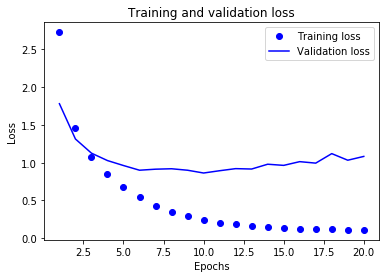

In [46]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


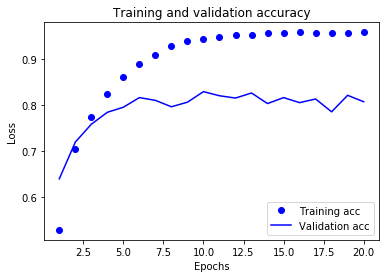

In [47]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy']) 
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 123us/step - loss: 2.5049 - accuracy: 0.5138 - val_loss: 1.6239 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 112us/step - loss: 1.3445 - accuracy: 0.7152 - val_loss: 1.2570 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 125us/step - loss: 1.0126 - accuracy: 0.7813 - val_loss: 1.1110 - val_accuracy: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8088 - accuracy: 0.8232 - val_loss: 1.0246 - val_accuracy: 0.7830
Epoch 5/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.6451 - accuracy: 0.8628 - val_loss: 0.9529 - val_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.5147 - accuracy: 0.8923 - val_loss: 0.9277 - val_accuracy: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.414

In [49]:
results

[1.0017395815675214, 0.7889581322669983]

This approach reaches an accuracy of ~80%

Generating predictions for new data

In [50]:
predictions = model.predict(x_test)

In [51]:
predictions[0].shape

(46,)

In [52]:
#The coefficients in this vector sum to 1:
np.sum(predictions[0])

0.9999999

In [53]:
#The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0]) 

3

In [54]:
predictions[0]

array([1.3082425e-05, 6.2166051e-05, 6.0105282e-05, 9.5653903e-01,
       2.7135791e-02, 3.2711364e-06, 3.4245291e-05, 4.9143360e-05,
       2.3888901e-03, 5.6793710e-05, 2.1948914e-04, 1.2173734e-03,
       8.8059336e-05, 1.8699460e-03, 1.2932143e-05, 1.6889793e-05,
       4.8291826e-04, 3.1630832e-04, 2.1573706e-04, 6.9634168e-04,
       5.7453481e-03, 3.0139837e-04, 1.0867236e-05, 1.0305670e-04,
       1.7097012e-04, 5.1608687e-05, 1.1911836e-06, 1.7684373e-05,
       3.2773896e-04, 5.3731428e-04, 2.9406152e-04, 2.2035073e-04,
       3.9681534e-05, 2.3744264e-05, 8.3767009e-05, 1.0734117e-05,
       3.5231578e-04, 8.3881729e-05, 5.8498572e-06, 3.1518048e-05,
       1.5473588e-05, 2.6586253e-05, 1.6777209e-05, 3.4182023e-05,
       3.1154043e-06, 1.2185966e-05], dtype=float32)

<h3>Predicting house prices: a regression example</h3>

The Boston Housing Price dataset

You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. 

The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are pro- portions, which take values between 0 and 1; others take values between 1 and 12, oth- ers between 0 and 100, and so on.


In [55]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [56]:
#LOOK AT DATA
train_data.shape

(404, 13)

In [57]:
test_data.shape

(102, 13)

In [58]:
train_data.shape

(404, 13)

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [59]:
train_targets.size

404

In [60]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.

<h4>Normalizing the data</h4>

In [61]:
mean = train_data.mean(axis=0) 
train_data -= mean

std = train_data.std(axis=0) 
train_data /= std
test_data -= mean 
test_data /= std

<h3>Building your network</h3>

A small network is one way to mitigate overfitting.

In [62]:
from keras import models
from keras import layers

def build_model(units):
    model = models.Sequential() 
    model.add(layers.Dense(units, activation='relu', input_shape=(train_data.shape[1],))) 
    model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    return model

The network ends with a single unit and no activation (it will be a linear layer). 
This is a typical setup for scalar regression

Note that you compile the network with the mse loss function—mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

Example: MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

<h3>K-fold validation</h3>

Because the training data is small, you want to use K-fold.

In [63]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [64]:
# Prepares the validation data: data from partition #k
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    #Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    #Builds the Keras model (already compiled)
    model = build_model(64)
    
    #Trains the model (in silent mode, verbose = 0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    #Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [65]:
all_scores

[2.0656650066375732, 2.2833757400512695, 2.8735909461975098, 2.470172882080078]

In [66]:
np.mean(all_scores)

2.4232011437416077

In [67]:
num_epochs = 500
all_mae_histories = [] 

#Prepares the validation data: data from partition #k
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    #Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model(64)
    
    #Trains the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [68]:
history.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

You can then compute the average of the per-epoch MAE scores for all folds.

In [69]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

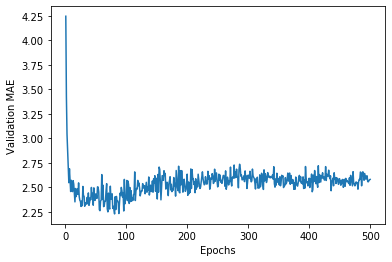

In [71]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Too hard to see, so we are going to omit the first 10 data points, and replace with moving average

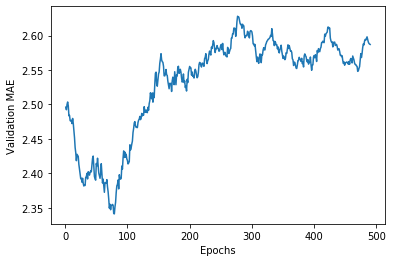

In [78]:
def smooth_curve(points, factor=0.9): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

MAE = Mean Aboslute error

Absolute error: Difference between true and observed

MAE is the sum of all the AE divided by the number of observations, so a low MAE is better.

According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.

Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [83]:
model = build_model(units = 80)

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 187us/step


In [84]:
test_mae_score

2.8403637409210205

When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.